In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

###### Data import

In [2]:
df=pd.read_csv(r"C:\Users\Chetan Habib\Downloads\mcdonalds (1).csv")
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [7]:
df.corr()

,Age
Age,1.0


In [9]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1448    False
1449    False
1450    False
1451    False
1452    False
Length: 1453, dtype: bool

##### EDA & pre-process

In [11]:
# Shape and missing values
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Value counts for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")

Shape: (1453, 15)

Missing values:
 yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

Value counts for yummy:
Yes    803
No     650
Name: yummy, dtype: int64

Value counts for convenient:
Yes    1319
No      134
Name: convenient, dtype: int64

Value counts for spicy:
No     1317
Yes     136
Name: spicy, dtype: int64

Value counts for fattening:
Yes    1260
No      193
Name: fattening, dtype: int64

Value counts for greasy:
Yes    765
No     688
Name: greasy, dtype: int64

Value counts for fast:
Yes    1308
No      145
Name: fast, dtype: int64

Value counts for cheap:
Yes    870
No     583
Name: cheap, dtype: int64

Value counts for tasty:
Yes    936
No     517
Name: tasty, dtype: int64

Value counts for expensive:
No     933
Y

In [12]:
from sklearn.preprocessing import LabelEncoder

# Binary encoding for Yes/No columns
binary_cols = df.columns[df.isin(['Yes', 'No']).any()]
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# Label encoding for remaining categorical features
le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

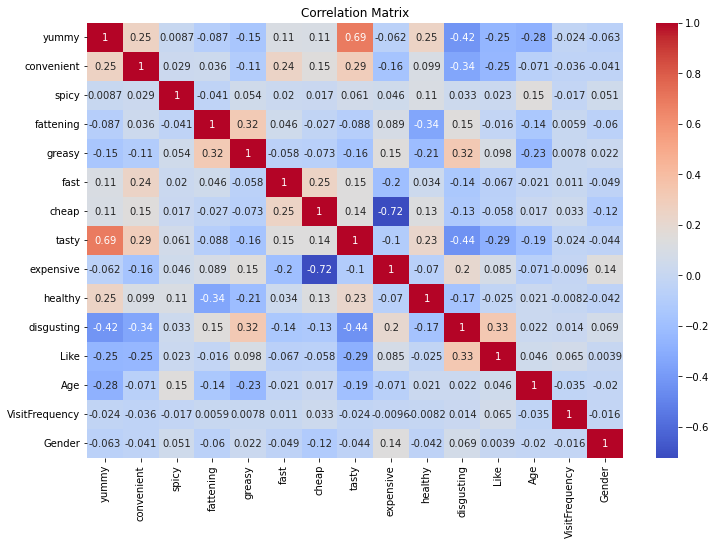

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [16]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,1,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,2,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,3,41,0,1


##### Data visulization 

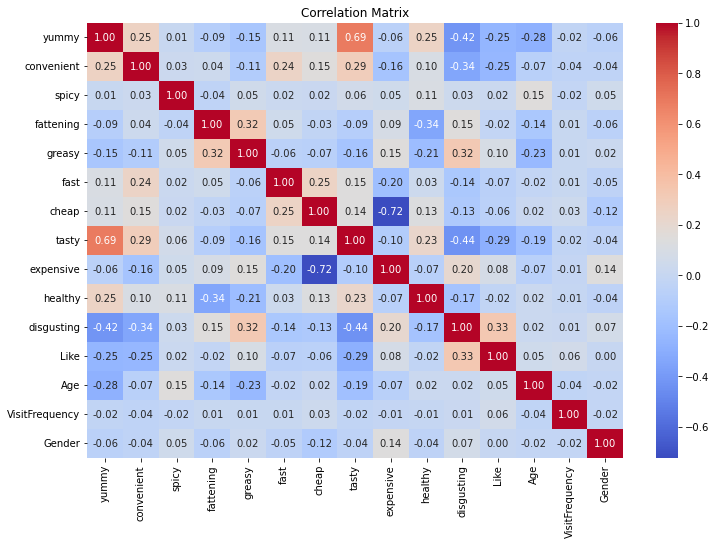

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

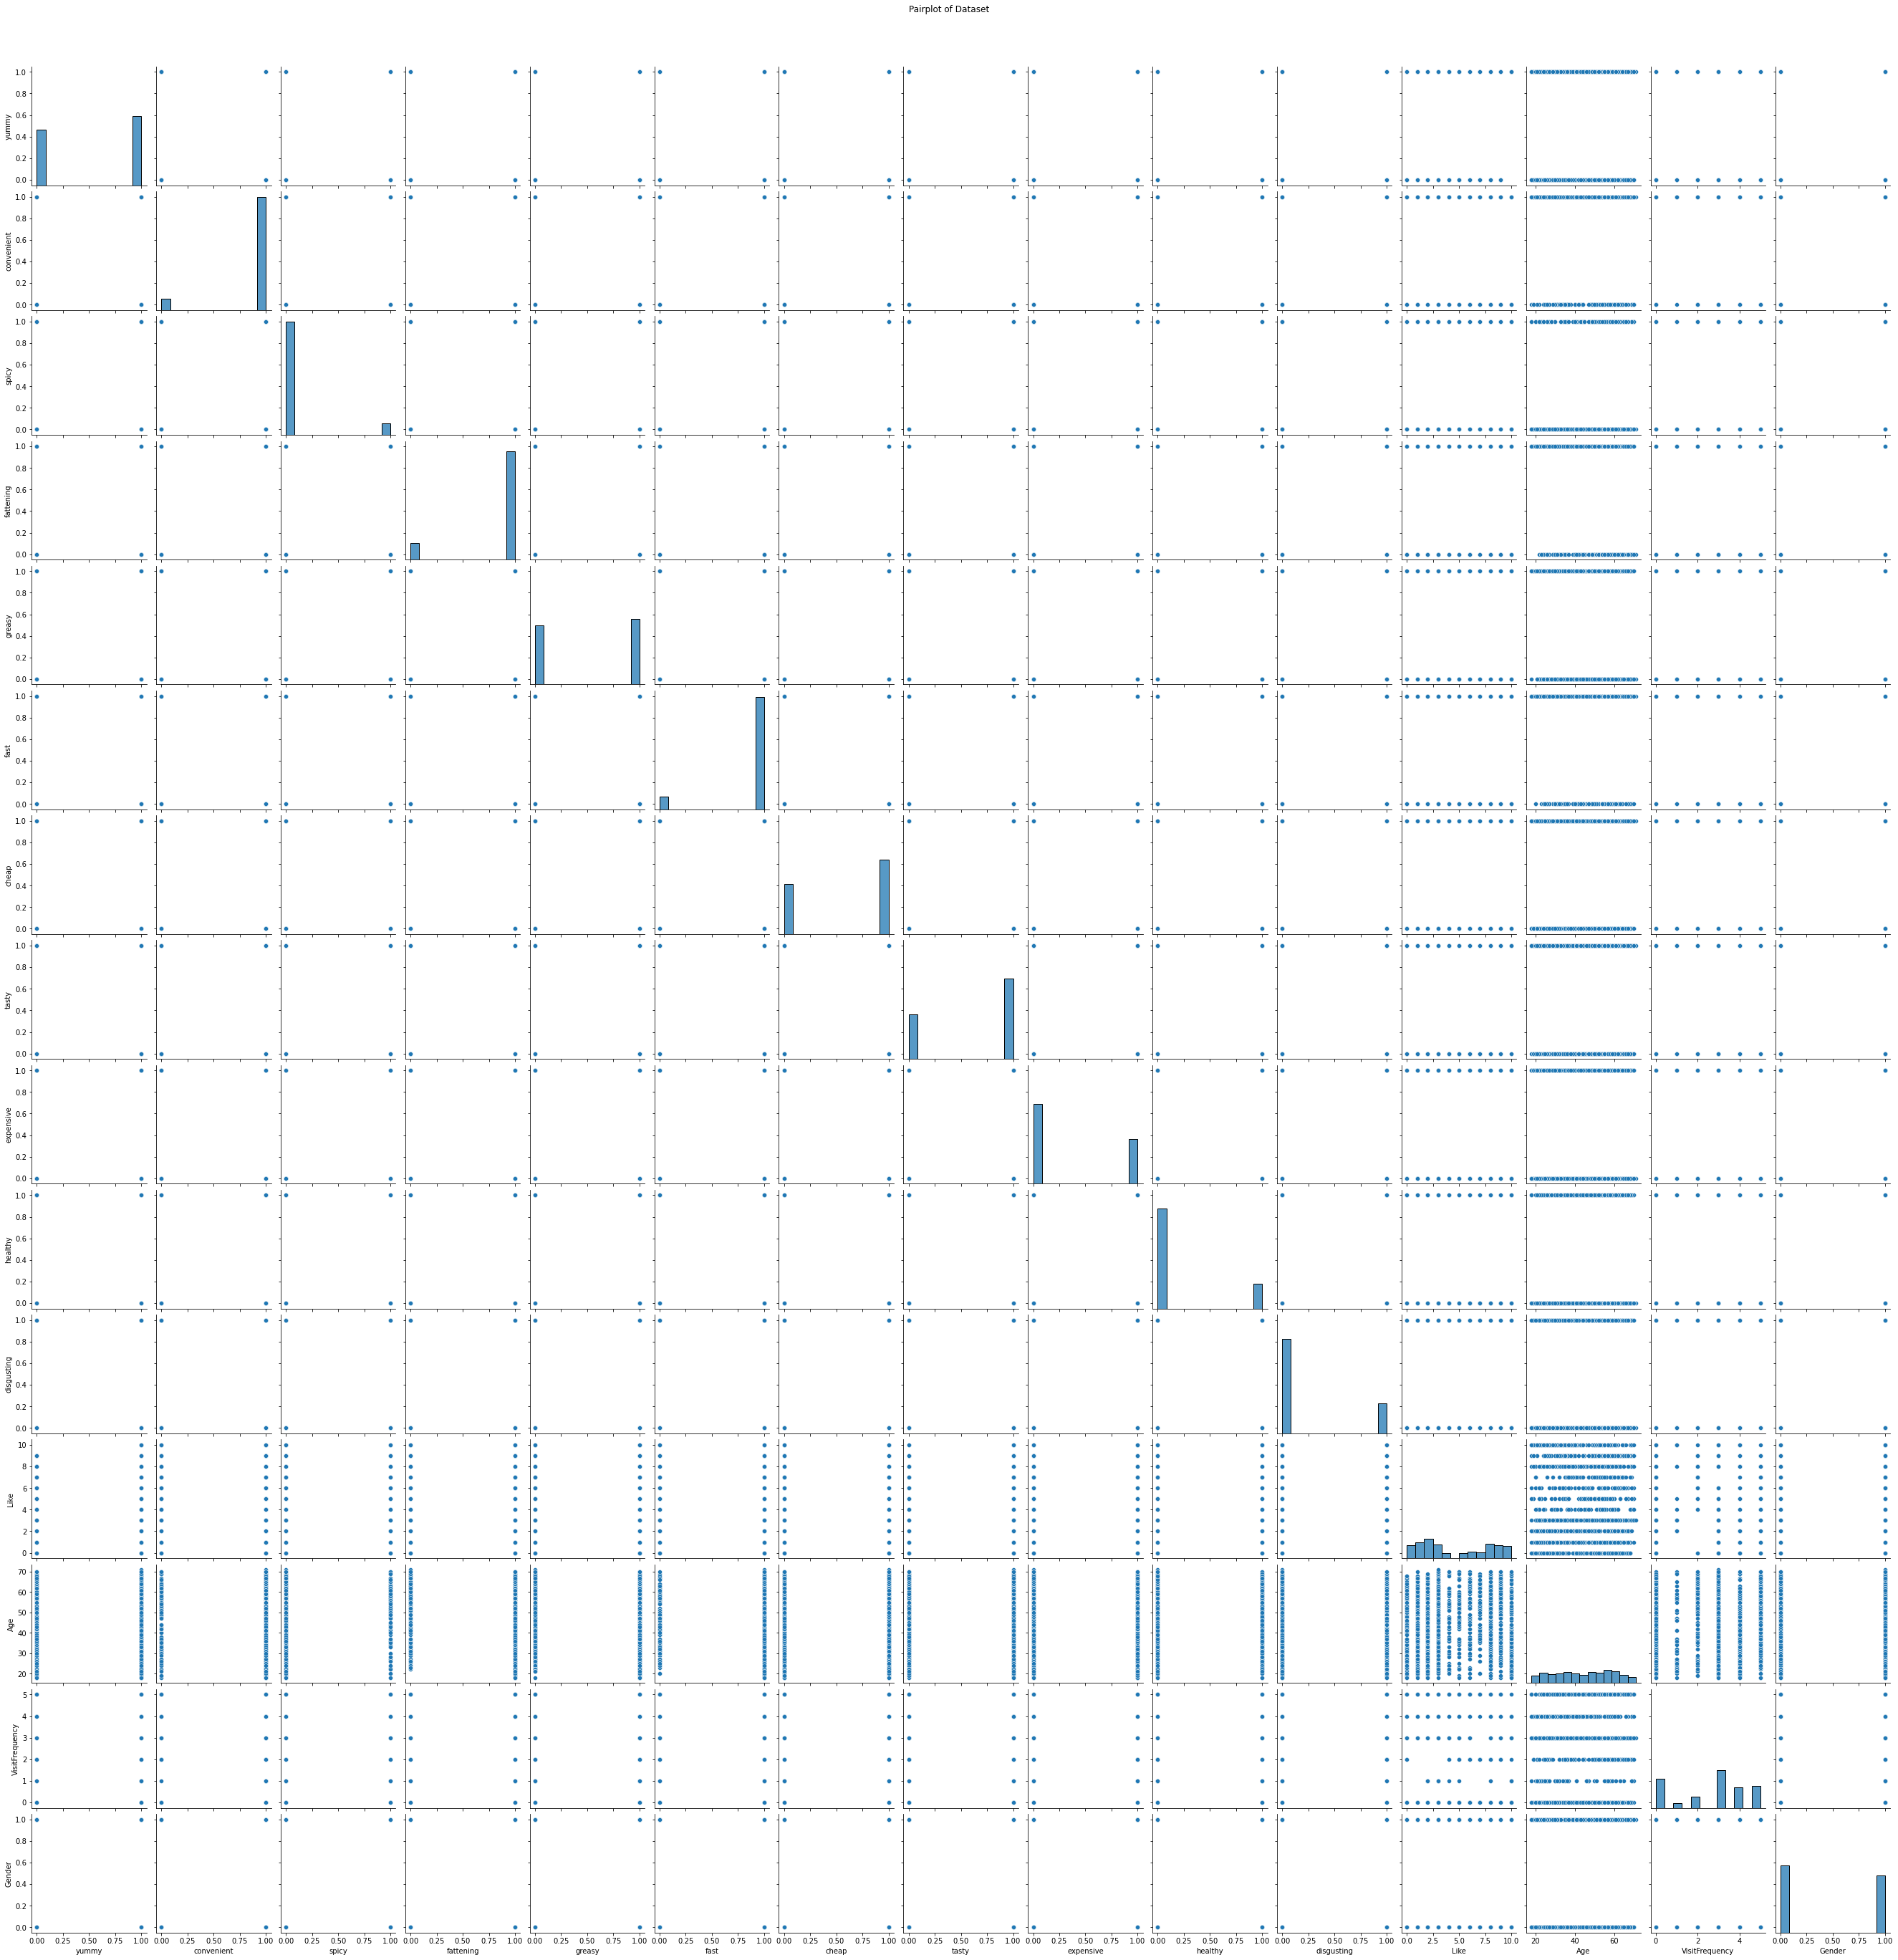

In [18]:
sns.pairplot(df)
plt.suptitle("Pairplot of Dataset", y=1.02)
plt.show()

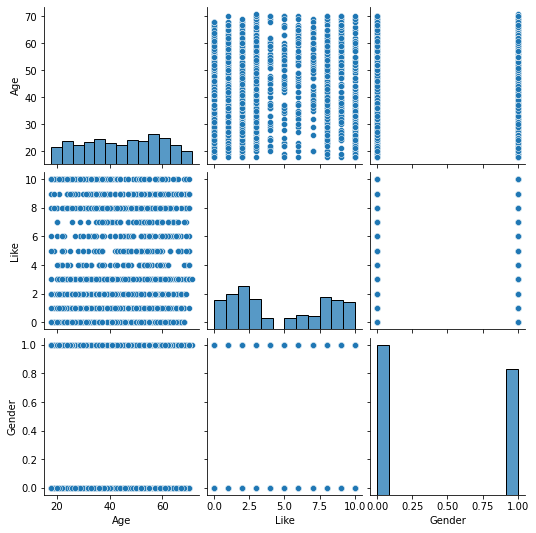

In [19]:
sns.pairplot(df[['Age', 'Like', 'Gender']])

In [ ]:
df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of All Columns", y=1.02)
plt.tight_layout()
plt.show()

In [20]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


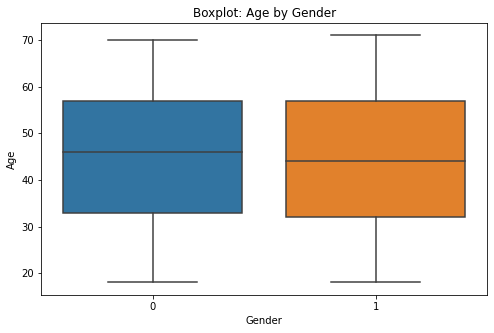

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Age')
plt.title("Boxplot: Age by Gender")
plt.show()

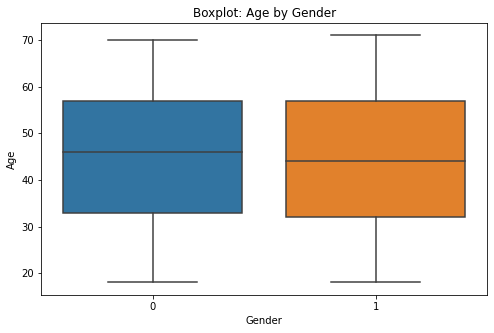

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Age')
plt.title("Boxplot: Age by Gender")
plt.show()

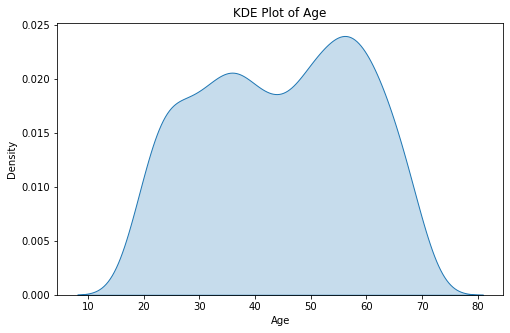

In [23]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Age'], fill=True)
plt.title("KDE Plot of Age")
plt.show()

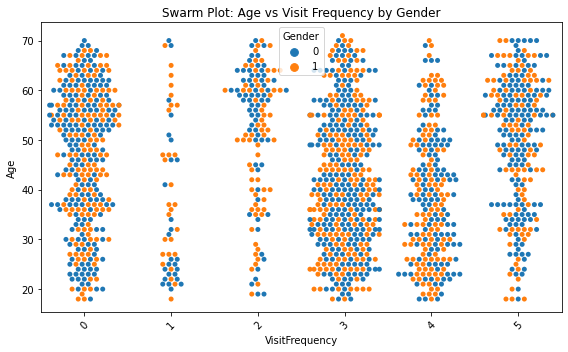

In [24]:
plt.figure(figsize=(8, 5))
sns.swarmplot(data=df, x='VisitFrequency', y='Age', hue='Gender')
plt.title("Swarm Plot: Age vs Visit Frequency by Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

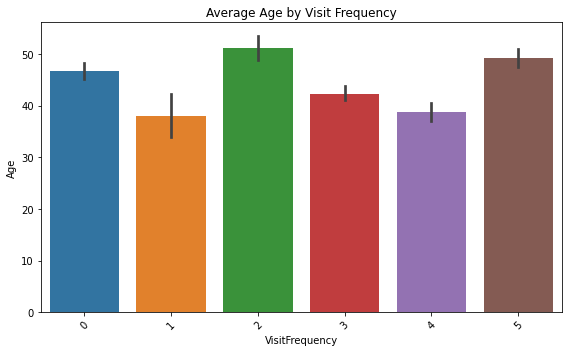

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='VisitFrequency', y='Age', estimator=np.mean)
plt.title("Average Age by Visit Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

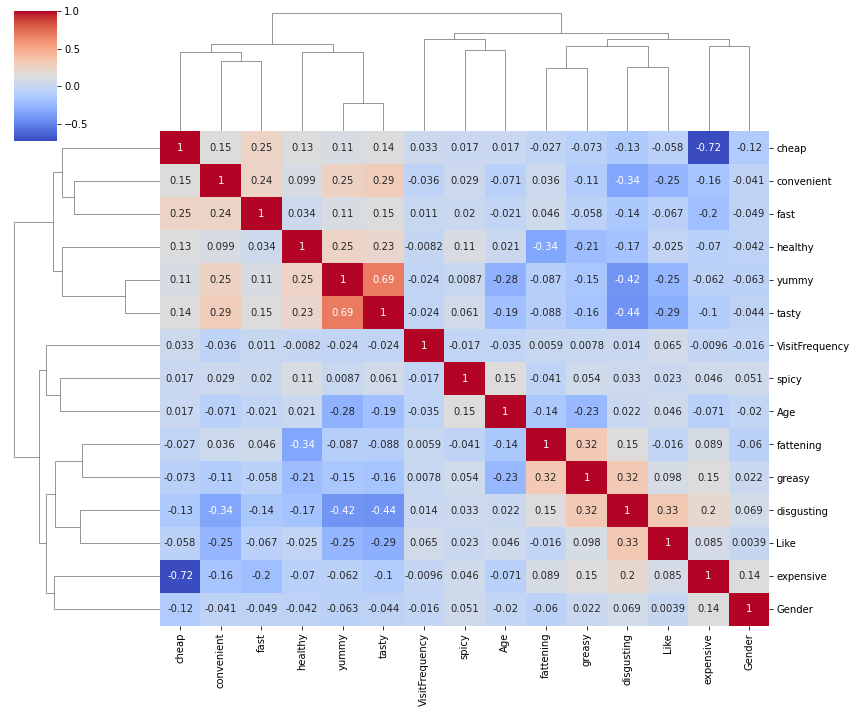

In [26]:
sns.clustermap(df.corr(), annot=True, cmap='coolwarm', figsize=(12, 10))

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [28]:
# Use only numeric data
df_num = df.select_dtypes(include=['int64', 'float64'])

# Fill missing values if any
df_num.fillna(df_num.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num)

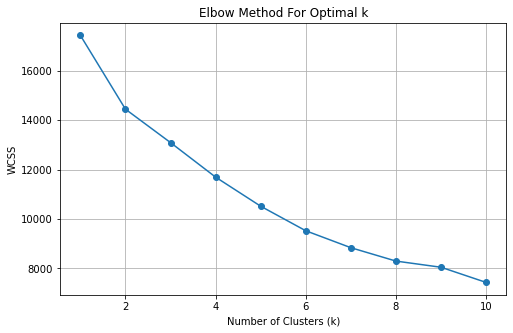

In [29]:
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [30]:
# Choose optimal k based on elbow method
optimal_k = 3  # example value, change as per your elbow plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

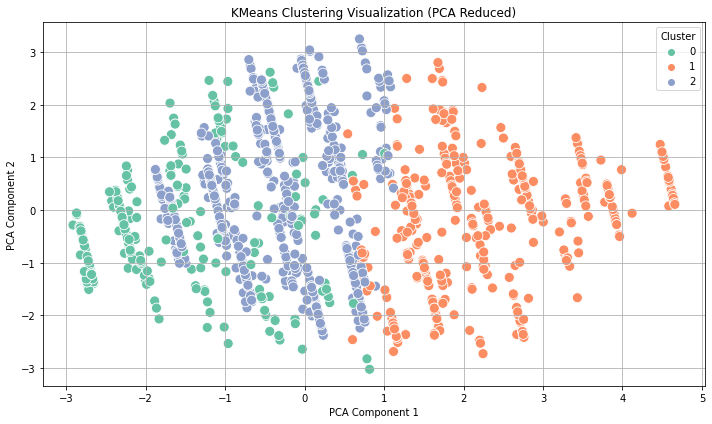

In [31]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='Set2', s=100)
plt.title("KMeans Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)


            yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.796992    0.954887  0.120301   0.360902  0.056391  0.924812   
1        0.049096    0.710594  0.074935   0.945736  0.723514  0.759690   
2        0.715000    0.987500  0.093750   0.997500  0.587500  0.960000   

            cheap     tasty  expensive   healthy  disgusting      Like  \
Cluster                                                                  
0        0.718045  0.864662   0.210526  0.755639    0.030075  4.323308   
1        0.333333  0.100775   0.607235  0.043928    0.731266  6.759690   
2        0.687500  0.833750   0.286250  0.088750    0.077500  3.713750   

               Age  VisitFrequency    Gender  
Cluster                                       
0        48.883459        2.586466  0.447368  
1        47.888889        2.702842  0.509044  
2        41.593750        2.623750  0.436250  


 Conclusion: K-Means Clustering on McDonald's Survey Dataset
After applying K-Means Clustering to the dataset, we were able to group customers into distinct clusters based on their responses and behavioral patterns.

🔹 Key Observations:
Optimal Number of Clusters:
Using the Elbow Method, we identified that the optimal number of clusters was k = 3 (you can change this based on the actual elbow curve).

Cluster Characteristics:
By analyzing the mean values for each feature within the clusters, we gained insights such as:

One cluster may consist of frequent visitors who generally like McDonald's.

Another might contain less frequent or neutral customers.

A third could be critical or dissatisfied customers.

PCA Visualization:
After reducing the data to 2 dimensions using PCA, the scatter plot clearly showed separation between clusters, indicating that K-Means was effective in capturing different customer segments.

Feature Importance:
Features like VisitFrequency, Like, and Age might have played an important role in distinguishing the clusters, as seen in the cluster centroids or mean values.

✅ Business Use Case:
Marketing teams can target each customer segment with personalized strategies.

Product development teams can understand which group is less satisfied and why.

Loyalty programs can be designed based on visit frequency and cluster behavior.

In [33]:
pca = PCA(n_components=2)  # Reduce to 2 components (you can adjust the number)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [34]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.23487501 0.14019085]


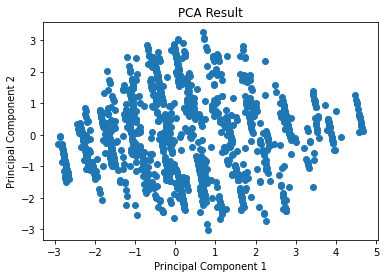

In [35]:
import matplotlib.pyplot as plt

plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()